In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('data.csv',encoding='unicode_escape')

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [10]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [11]:
# Since the Description and Customer ID cannot be filled with any method, we will remove the rows
df = df.dropna()

<Axes: ylabel='UnitPrice'>

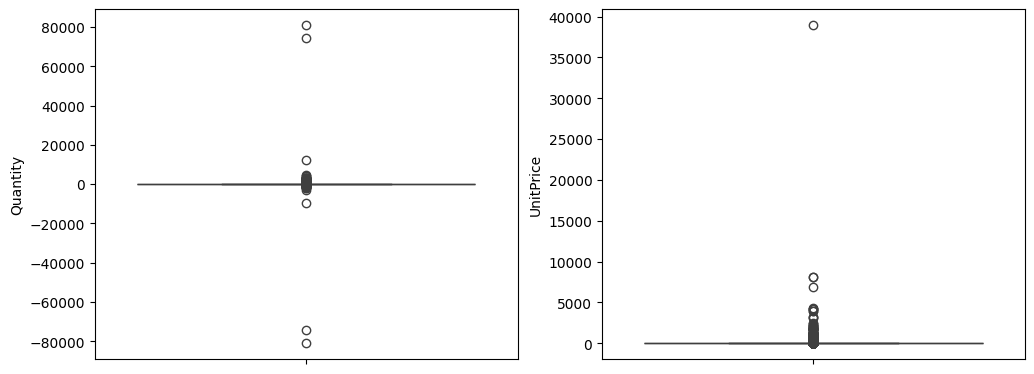

In [12]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(data = df['Quantity'])

plt.subplot(2,2,2)
sns.boxplot(data = df['UnitPrice'])

In [13]:
# Dropping all the negative rows
df = df[df['Quantity'] > 0]

In [14]:
# Using Inter Quartile Range to clean the data from the 
def remove_outliers(df, column_names, threshold=3):
    q1 = df[column_names].quantile(0.25)
    q3 = df[column_names].quantile(0.75)
    iqr = q3 - q1
    outliers = (df[column_names] < q1 - 1.5 * iqr) | (df[column_names] > q3 + 1.5 * iqr)
    df_cleaned = df[~outliers.any(axis=1)]
    return df_cleaned

# I have also used Z-Score Method but it wasnt very helpful in our case 

In [15]:
cleaned_df = remove_outliers(df,['Quantity','UnitPrice'])

<Axes: ylabel='UnitPrice'>

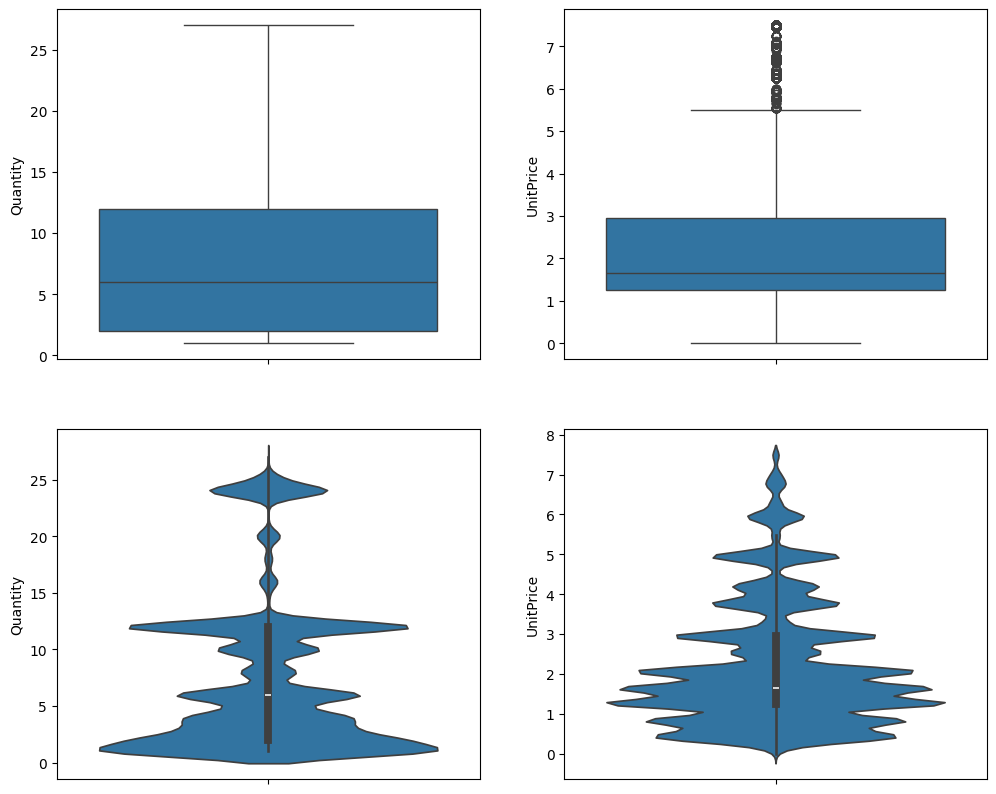

In [16]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
sns.boxplot(data = cleaned_df['Quantity'])

plt.subplot(2,2,2)
sns.boxplot(data = cleaned_df['UnitPrice'])

plt.subplot(2,2,3)
sns.violinplot(data = cleaned_df['Quantity'])

plt.subplot(2,2,4)
sns.violinplot(data = cleaned_df['UnitPrice'])

In [17]:
cleaned_df['TotalOrderValue'] = cleaned_df['Quantity']*cleaned_df['UnitPrice']

C:\Users\rishi\AppData\Local\Temp\ipykernel_2812\721036730.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['TotalOrderValue'] = cleaned_df['Quantity']*cleaned_df['UnitPrice']


In [18]:
cleaned_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalOrderValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [19]:
# Converting the Datatime into Pandas Date Time
cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'])

C:\Users\rishi\AppData\Local\Temp\ipykernel_2812\2484890984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['InvoiceDate'] = pd.to_datetime(cleaned_df['InvoiceDate'])


In [20]:
cleaned_df.to_csv('cleaned.csv')